In [2]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

df = pd.read_csv("C:/Users/Alperen Arda/OneDrive/Desktop/GitHub/FlightDelayCancellation/src/semi_clean_data.csv")
df.head()

C:\Users\Alperen Arda\AppData\Local\Temp\ipykernel_8096\3621268061.py:4: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Alperen Arda/OneDrive/Desktop/GitHub/FlightDelayCancellation/src/semi_clean_data.csv")


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


In [3]:
df['TAXI_OUT'][50:70]

50     9.0
51    11.0
52    24.0
53    15.0
54    12.0
55    22.0
56    10.0
57    19.0
58    12.0
59    16.0
60    10.0
61    23.0
62    14.0
63    16.0
64    37.0
65    21.0
66    15.0
67    15.0
68    14.0
69    12.0
Name: TAXI_OUT, dtype: float64

In [4]:
df['TAXI_OUT'].min()

np.float64(1.0)

In [5]:
bins = [-40, -20, -10, 0, 10, 20, 30, 50]
labels = ['Ultra Low', 'Very Low', 'Low', 'Medium', 'High', 'Very High', 'Ultra']
df['cat_taxi'] = pd.cut(df['ARRIVAL_DELAY'], bins=bins, labels=labels)

<Axes: xlabel='Category', ylabel='Count'>

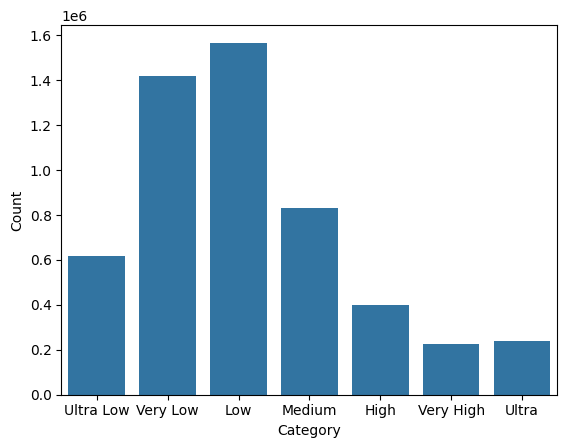

In [6]:
import seaborn as sns

category_counts = df['cat_taxi'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']  # Kolon isimlerini düzenle

sns.barplot(x=category_counts['Category'], y=category_counts['Count'])

In [7]:
df.count()

MONTH                  5714008
DAY                    5714008
DAY_OF_WEEK            5714008
AIRLINE                5714008
FLIGHT_NUMBER          5714008
TAIL_NUMBER            5714008
ORIGIN_AIRPORT         5714008
DESTINATION_AIRPORT    5714008
SCHEDULED_DEPARTURE    5714008
DEPARTURE_TIME         5714008
DEPARTURE_DELAY        5714008
TAXI_OUT               5714008
WHEELS_OFF             5714008
SCHEDULED_TIME         5714008
ELAPSED_TIME           5714008
AIR_TIME               5714008
DISTANCE               5714008
WHEELS_ON              5714008
TAXI_IN                5714008
SCHEDULED_ARRIVAL      5714008
ARRIVAL_TIME           5714008
ARRIVAL_DELAY          5714008
cat_taxi               5299315
dtype: int64

In [8]:
feature_list = ['DEPARTURE_DELAY', 'TAXI_OUT', 'ELAPSED_TIME', 'TAXI_IN', 'ARRIVAL_DELAY']
df_continuous = df[feature_list]

In [9]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=5)
reduced_df = pca.fit_transform(df_continuous)

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit_predict(reduced_df)

c:\Users\Alperen Arda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


array([-1,  1,  1, ...,  1,  1,  1], shape=(5714008,))

In [10]:
df_scores = clf.negative_outlier_factor_

In [12]:
import numpy as np
df_scores[0:10]

array([-1.23616533, -1.06269009, -1.00996169, -0.99418405, -0.95504126,
       -1.01656378, -0.97605586, -0.99810774, -1.17305176, -1.01745067])

In [22]:
percentile = 0.03
threshold = np.percentile(df_scores, percentile*100)
threshold

np.float64(-1.1649174473839952)

In [23]:
df_scores[df_scores < threshold]

array([-1.23616533, -1.17305176, -1.17947664, ..., -1.32098179,
       -1.36265135, -1.23990573], shape=(171421,))

In [26]:
df = pd.read_csv("C:/Users/Alperen Arda/OneDrive/Desktop/GitHub/FlightDelayCancellation/src/semi_clean_data.csv")
df.head()

C:\Users\Alperen Arda\AppData\Local\Temp\ipykernel_8096\2608024311.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Alperen Arda/OneDrive/Desktop/GitHub/FlightDelayCancellation/src/semi_clean_data.csv")


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


In [35]:
from preprocess_flights import DataPreprocessor

feature_list = ['DEPARTURE_DELAY', 'TAXI_OUT', 'ELAPSED_TIME', 'TAXI_IN', 'ARRIVAL_DELAY']


processor = DataPreprocessor()

processor.outlier_analysis_single_var(df, feature_list)
df

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0
5714004,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0
5714005,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0
5714006,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0


In [34]:
from preprocess_flights import DataPreprocessor

feature_list = ['DEPARTURE_DELAY', 'TAXI_OUT', 'ELAPSED_TIME', 'TAXI_IN', 'ARRIVAL_DELAY']


processor = DataPreprocessor()

processor.outlier_analysis_single_var(df, feature_list)

processor.outlier_analysis_multi_vars(df, feature_list)

df

c:\Users\Alperen Arda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0
5714004,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0
5714005,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0
5714006,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0
